# THIS IS A CASE STUDY IN WHICH WE WILL USE TITANIC DATASET. IN THIS OUR MAIN MOTIVE IS TO VERIFY CENTRAL LIMIT THEOREM

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df = pd.concat([train_df.drop(columns = ['Survived']), test_df]).sample(1309)

<Axes: ylabel='Density'>

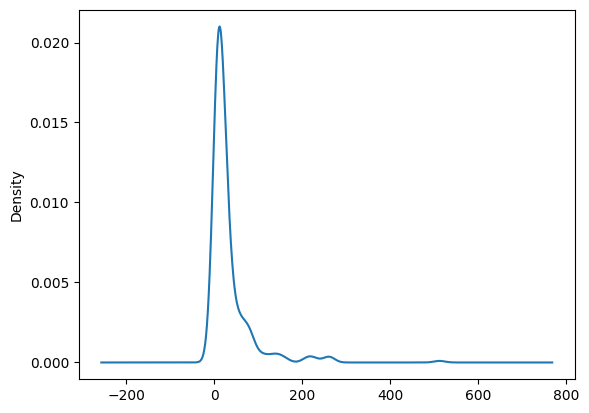

In [4]:
df['Fare'].plot(kind = 'kde')

**MAKING 100 SAMPLES EACH OF SIZE 5O**

In [5]:
samples =[]

for i in range(100):
    samples.append(df["Fare"].dropna().sample(50).values.tolist())

In [6]:
samples  = np.array(samples)

**CALCULATING MEAN OF EACH SAMPLE**

In [7]:
sampling_mean = samples.mean(axis = 1)

***This graphs looks like normal distribution and thats what central limit theorem says***

<Axes: ylabel='Density'>

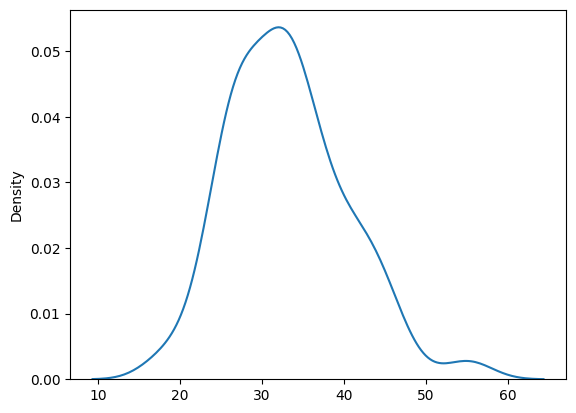

In [8]:
sns.kdeplot(sampling_mean)

**Now we are calculating the mean by CLT and then will compare it with the real mean**

In [9]:
# original mean

df['Fare'].mean()

np.float64(33.29547928134557)

In [10]:
# mean that we get by clt

sampling_mean.mean()

np.float64(33.12443982)

In [11]:
# We will give a range in which mean can lie

# standard diviation of sample
sampling_mean.std()/np.sqrt(50)

np.float64(1.013678978253721)

In [12]:
lower_limit = sampling_mean.mean() - 2*sampling_mean.std()/np.sqrt(50)
upper_limit = sampling_mean.mean() + 2*sampling_mean.std()/np.sqrt(50)

In [13]:
print('The range is',lower_limit,'-',upper_limit)

The range is 31.09708186349256 - 35.15179777650744
